# ***Crime Dataset***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the dataset we choose
df=pd.read_csv("/content/Dataset1.csv")

In [ ]:
df.head()

,idper,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,...,weapcat,injury,serious,treatment,offenderage,offendersex,offtracenew,wgtviccy,series,newwgt
0,150102759544999999999913501,1993.1,1993,6,2,2,1,1,4,-1,...,5.0,0,1,0,3,1,-1,8442.41411,1,8442.41411
1,150123750403999999999911602,1993.1,1993,4,2,2,1,1,4,-1,...,0.0,0,1,0,1,1,-1,5158.88511,1,5158.88511
2,150166998771999999999913502,1993.1,1993,3,2,2,2,2,2,-1,...,0.0,1,3,1,2,1,-1,3006.10621,1,3006.10621
3,150283624848999999999931601,1993.1,1993,2,1,2,1,1,6,-1,...,0.0,0,1,0,3,1,-1,4533.87724,1,4533.87724
4,150283624848999999999931601,1993.1,1993,2,1,2,1,1,6,-1,...,0.0,0,1,0,3,1,-1,4533.87724,1,4533.87724


# ***Data preprocessing***


*   Data Cleaning
*   Data Integration
*   Data Transformation



## Data cleaning

### Delet data

**Delete**

idper, notify, vicservices, weapon, weapcat, treatment, offenderage,offendersex, offtracenew, wgtviccy, newwgt, direl, location, veteran, citizen, injury, newcrime, hincom2, msa, locality, hispanic, race

In [ ]:
# deleted features related to offenders to focus on our objective
columns_to_drop = [
    'idper', 'notify', 'vicservices', 'weapon',
    'weapcat', 'treatment', 'offenderage', 'offendersex',
    'offtracenew', 'wgtviccy', 'newwgt', 'direl', 'locationr',
    'veteran', 'citizen', 'injury', 'newcrime', 'hincome2',
    'msa', 'locality', 'hispanic', 'race'
]

df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.isnull().sum() # Check the null value

yearq             0
year              0
ager              0
sex               0
race_ethnicity    0
hincome1          0
marital           0
popsize           0
region            0
educatn1          0
educatn2          0
newoff            0
seriousviolent    0
serious           0
series            0
dtype: int64

**Duplicate data**
: Delete

In [ ]:
# Drop the data that we evaluated useless
duplicate_count = df.duplicated().sum()
print(duplicate_count)

9349


In [ ]:
# Drop the duplicate
df=df.drop_duplicates()
df

,yearq,year,ager,sex,race_ethnicity,hincome1,marital,popsize,region,educatn1,educatn2,newoff,seriousviolent,serious,series
0,1993.1,1993,6,2,1,4,4,-1,-1,4,-1,5,3,1,1
1,1993.1,1993,4,2,1,4,2,-1,-1,5,-1,2,1,1,1
2,1993.1,1993,3,2,2,2,1,-1,-1,4,-1,4,2,3,1
3,1993.1,1993,2,1,1,6,2,-1,-1,5,-1,4,2,1,1
6,1993.1,1993,5,2,6,6,4,-1,-1,4,-1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65635,2022.4,2022,5,1,6,5,2,1,4,4,5,3,1,1,1
65636,2022.4,2022,5,1,6,5,2,1,4,4,5,2,1,1,1
65637,2022.4,2022,5,1,6,5,2,1,4,4,5,3,1,3,1
65638,2022.4,2022,5,1,6,6,4,3,4,5,8,4,2,3,1


In [ ]:
# Give the new order to 'newoff', 'seriousviolent', and 'series'
new_order = list(df.columns)

idx1 = new_order.index('newoff')
idx2 = new_order.index('seriousviolent')
idx3 = new_order.index('series')

new_order[idx1], new_order[idx2], new_order[idx3] = 'series', 'newoff', 'seriousviolent'

df = df[new_order]
df.head(1)

,yearq,year,ager,sex,race_ethnicity,hincome1,marital,popsize,region,educatn1,educatn2,series,newoff,serious,seriousviolent
0,1993.1,1993,6,2,1,4,4,-1,-1,4,-1,1,5,1,3


### Missing value



**Popsize**

In [ ]:
# Define the 'most_common_popsize' variable that calculate the mode value, which is consider the 'year', 'ager', 'newoff' attributes
# We can expect that this process gets less bias in imputing the missing value
# Find the 'region' value that appears most frequently in each group
most_common_popsize = df[df['popsize'] != -1].groupby(['year', 'ager', 'newoff'])['popsize'].agg(lambda x: x.value_counts().idxmax()).reset_index()

# Convert the result into dictionary to inquire it faster
most_common_popsize_dict = most_common_popsize.set_index(['year', 'ager', 'newoff'])['popsize'].to_dict()

# Calculate the entire mode value of the 'popsize' column
overall_mode = df['popsize'][df['popsize'] != -1].mode()[0]

# Define the function 'fill_popsize' that fill in the missing value(-1) of the 'popsize' column
# Function explanation: Replace the missing value(-1) into 'most_common_region' value, if there is no proper value, then fill in it with overall_mode
def fill_popsize(row):
    if row['popsize'] == -1:
        return most_common_popsize_dict.get((row['year'], row['ager'], row['newoff']), overall_mode)
    return row['popsize']

# Fill in the missing value
df['popsize'] = df.apply(fill_popsize, axis=1)
df['popsize'] = df['popsize'].astype(int)

In [ ]:
print(df['popsize'].value_counts())

popsize
1    29950
0     9766
2     5254
5     4295
3     3630
4     3396
Name: count, dtype: int64


**hincome**

In [ ]:
# Same process as 'popsize' imputing
most_common_hincome1 = df[df['hincome1'] != 98].groupby(['year', 'ager', 'newoff'])['hincome1'].agg(lambda x: x.value_counts().idxmax()).reset_index()
most_common_hincome1_dict = most_common_hincome1.set_index(['year', 'ager', 'newoff'])['hincome1'].to_dict()

def fill_hincome1(row):
    if row['hincome1'] == 98:
        return most_common_hincome1_dict.get((row['year'], row['ager'], row['newoff']), df['hincome1'].mode()[0])
    return row['hincome1']

df['hincome1'] = df.apply(fill_hincome1, axis=1)
df['hincome1'] = df['hincome1'].astype(int)

In [ ]:
print(df['hincome1'].value_counts())

hincome1
7    11122
3     8506
5     8405
6     8219
2     7158
4     7128
1     5753
Name: count, dtype: int64


**marital**

In [ ]:
# Similar process as imputing above: Consider the 'ager' attribute to fill in the missing value(98)

most_common_marital = df[df['marital'] != 98].groupby('ager')['marital'].agg(lambda x: x.value_counts().idxmax())
print(most_common_marital)

df.loc[df['marital'] == 98, 'marital'] = df[df['marital'] == 98]['ager'].map(most_common_marital)
print(df['marital'].value_counts())

df['marital'] = df['marital'].replace([3, 4, 5], 3)

ager
1    1
2    1
3    1
4    2
5    2
6    2
Name: marital, dtype: int64
marital
1    28413
2    15330
4     8112
5     3054
3     1382
Name: count, dtype: int64


In [ ]:
print(df['marital'].value_counts()) # Single 1 | Married 2 | Parted 3

marital
1    28413
2    15330
3    12548
Name: count, dtype: int64


**region**

In [ ]:
df2 =pd.read_csv("/content/Dataset1.csv")

In [ ]:
# Same process as 'popsize' imputing
most_common_region = df2[df2['region'] != -1].groupby(['year', 'ager', 'newoff'])['region'].agg(lambda x: x.value_counts().idxmax()).reset_index()

most_common_region_dict = most_common_region.set_index(['year', 'ager', 'newoff'])['region'].to_dict()

def fill_region(row):
    if row['region'] == -1:
        return most_common_region_dict.get((row['year'], row['ager'], row['newoff']), df['region'].mode())
    return row['region']

df['region'] = df.apply(fill_region, axis=1)

In [ ]:
df['region'] = df['region'].astype(int)

df['region'].value_counts()

region
3    22217
4    13957
2    12581
1     7536
Name: count, dtype: int64

### Outlier Data

In [ ]:
# Define the 'plot_boxplot' function that returns the boxplot of specified columns
def plot_boxplot(df, numerical_column, categorical_column):

    df.boxplot(column=numerical_column, by=categorical_column)

    plt.ylabel(numerical_column)
    plt.xlabel(categorical_column)
    plt.title("{} Distribution by {}".format(numerical_column, categorical_column))
    plt.suptitle("")
    plt.show()

In [ ]:
# Define the 'remove_outliers' function that removes outliers based on the boxplot
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

## Data Integration

**educatn1 + educatn2**

In [ ]:
# Similar imputation process as above, but this code integrates the 'educatn1' and 'educatn2' variables, both represent the education information of victims

most_common_educatn2 = df[(df['educatn2'] != -1) & (df['educatn2'] != 98)].groupby(['year', 'ager', 'educatn1'])['educatn2'].agg(lambda x: x.value_counts().idxmax()).reset_index()
most_common_educatn2_dict = most_common_educatn2.set_index(['year', 'ager', 'educatn1'])['educatn2'].to_dict()

default_mode = df[df['educatn2'] != -1]['educatn2'].mode()[0]

def fill_educatn2(row):
    if row['educatn2'] in [-1, 98]:
        return most_common_educatn2_dict.get((row['year'], row['ager'], row['educatn1']), default_mode)
    return row['educatn2']

df['educatn2'] = df.apply(fill_educatn2, axis=1)
df['educatn2'].value_counts()

educatn2
6.0    35768
5.0     6718
4.0     4448
7.0     4198
3.0     2480
8.0     2144
2.0      495
1.0       40
Name: count, dtype: int64

## Data Transformation

**yearq + year**

In [ ]:
# Sort the 'year' variable in ascending order
print(df['year'].value_counts().sort_index())

year
1993    2729
1994    3510
1995    3219
1996    3346
1997    3013
1998    2716
1999    2351
2000    2086
2001    1881
2002    1658
2003    1571
2004    1494
2005    1287
2006    1587
2007    1410
2008    1200
2009    1106
2010    1106
2011    1210
2012    1521
2013    1281
2014    1206
2015    1227
2016    1650
2017    1989
2018    2063
2019    1939
2020    1435
2021    1613
2022    1887
Name: count, dtype: int64


In [ ]:
# Binning: Cluster values of 'year' in equal depth
def equal_depth_binning(df, column, bins):
    df[f'{column}_binned'] = pd.qcut(df[column], q=bins, labels=False)
    return df

df = equal_depth_binning(df, 'year', 5)
print(df)

        yearq  year  ager  sex  race_ethnicity  hincome1  marital  popsize  \
0      1993.1  1993     6    2               1         4        3        1   
1      1993.1  1993     4    2               1         4        2        1   
2      1993.1  1993     3    2               2         2        1        1   
3      1993.1  1993     2    1               1         6        2        1   
6      1993.1  1993     5    2               6         6        3        1   
...       ...   ...   ...  ...             ...       ...      ...      ...   
65635  2022.4  2022     5    1               6         5        2        1   
65636  2022.4  2022     5    1               6         5        2        1   
65637  2022.4  2022     5    1               6         5        2        1   
65638  2022.4  2022     5    1               6         6        3        3   
65639  2022.4  2022     4    2               1         5        1        1   

       region  educatn1  educatn2  series  newoff  serious  ser

In [ ]:
print(df['year_binned'].value_counts().sort_index())

year_binned
0    12804
1    10166
2    10888
3    11507
4    10926
Name: count, dtype: int64


In [ ]:
# Change the order of 'year_binned' column
cols = df.columns.tolist()
cols = ['year_binned'] + [col for col in cols if col != 'year_binned']
df = df[cols]

In [ ]:
columns_to_drop = ['year', 'yearq']
df.drop(columns=columns_to_drop, inplace=True)

<ipython-input-79-2d48facf2c62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, inplace=True)


**series**

In [ ]:
df['series'] = df['series'].replace({1: 0, 2: 1})
print(df['series'].value_counts())

series
0    53324
1     2967
Name: count, dtype: int64


<ipython-input-80-aa5e47181cae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['series'] = df['series'].replace({1: 0, 2: 1})


In [ ]:
df.head()

,year_binned,ager,sex,race_ethnicity,hincome1,marital,popsize,region,educatn1,educatn2,series,newoff,serious,seriousviolent
0,0,6,2,1,4,3,1,3,4,6.0,0,5,1,3
1,0,4,2,1,4,2,1,3,5,6.0,0,2,1,1
2,0,3,2,2,2,1,1,3,4,6.0,0,4,3,2
3,0,2,1,1,6,2,1,3,5,6.0,0,4,1,2
6,0,5,2,6,6,3,1,3,4,6.0,0,3,1,1


**ager**

In [ ]:
print(df['ager'].value_counts())

ager
4    13974
3    12092
2    10449
1     9657
5     7631
6     2488
Name: count, dtype: int64


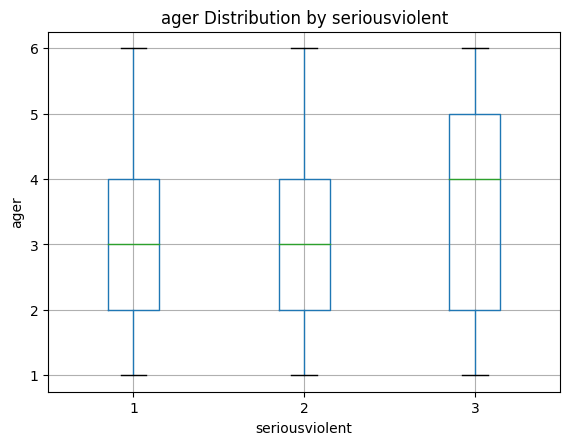

In [ ]:
# Draw the boxplot between 'seriousviolent' and 'ager', using the 'plot_boxplot' function
plot_boxplot(df, 'ager', 'seriousviolent')

**sex**

In [ ]:
df['sex'] = df['sex'].map({1: 0, 2: 1})
print(df['sex'].value_counts())

sex
0    28786
1    27505
Name: count, dtype: int64


**race_ethnicity**

In [ ]:
race_eth_str = df['race_ethnicity'].replace({1: 'White', 2: 'Black', 3: 'Native', 4: 'Asian-Pacific', 5: 'mixed', 6: 'Hispanic'})
race_eth_str.value_counts()

race_ethnicity
White            38457
Hispanic          7521
Black             7342
Asian-Pacific     1361
mixed              944
Native             666
Name: count, dtype: int64

In [ ]:
race_eth_str.isnull().sum()

0

## y label

In [ ]:
# Find the mode value of 'serious' variable
serious_mode = df[df['serious'] != 98]['serious'].mode()[0]
df['serious'].replace(98, serious_mode, inplace=True)

# We decided to integrate the value '3' with '1', and desginate the value '4' as '3'
df['serious']=df['serious'].replace({1:1, 2:2, 3:1, 4:3})

df['serious'].value_counts()

serious
1    53147
2     2305
3      839
Name: count, dtype: int64

In [ ]:
df['serious'].isnull().sum()

0

In [ ]:
# Create the new y label, using values of 'newoff' and 'serious' attributes
# New y label is a multi-labeled variable
df['y_label'] = None

df.loc[df['newoff'] == 1, 'y_label'] = df[df['newoff'] == 1]['serious'].map({1: 'minor sexual assult', 2: '(Quasi-)Rape', 3: '(Quasi-)Rape'})
df.loc[df['newoff'] == 2, 'y_label'] = 'robbery'
df.loc[df['newoff'] == 3, 'y_label'] = df[df['newoff'] == 3]['serious'].map({1: 'minor aggravated assult', 2: 'serious aggravated assult'})
df.loc[df['newoff'] == 4, 'y_label'] = 'simple assult'
df.loc[df['newoff'] == 5, 'y_label'] = 'theft/larceny'

df['y_label'].value_counts()

y_label
simple assult                33116
minor aggravated assult       9928
robbery                       6564
minor sexual assult           2037
theft/larceny                 2030
serious aggravated assult     1672
(Quasi-)Rape                   944
Name: count, dtype: int64

In [ ]:
# Drop the rest of columns
drop_columns = ['educatn1', 'newoff', 'serious', 'seriousviolent', 'newoff']
df.drop(columns = drop_columns, inplace = True)

## result

In [ ]:
df

,year_binned,ager,sex,race_ethnicity,hincome1,marital,popsize,region,educatn2,series,y_label
0,0,6,1,1,4,3,1,3,6.0,0,theft/larceny
1,0,4,1,1,4,2,1,3,6.0,0,robbery
2,0,3,1,2,2,1,1,3,6.0,0,simple assult
3,0,2,0,1,6,2,1,3,6.0,0,simple assult
6,0,5,1,6,6,3,1,3,6.0,0,minor aggravated assult
...,...,...,...,...,...,...,...,...,...,...,...
65635,4,5,0,6,5,2,1,4,5.0,0,minor aggravated assult
65636,4,5,0,6,5,2,1,4,5.0,0,robbery
65637,4,5,0,6,5,2,1,4,5.0,0,minor aggravated assult
65638,4,5,0,6,6,3,3,4,8.0,0,simple assult


#***Encoding***

* Encoding
* Data Split

## Encoding

In [ ]:
df.head()

,year_binned,ager,sex,race_ethnicity,hincome1,marital,popsize,region,educatn2,series,y_label
0,0,6,1,1,4,3,1,3,6.0,0,theft/larceny
1,0,4,1,1,4,2,1,3,6.0,0,robbery
2,0,3,1,2,2,1,1,3,6.0,0,simple assult
3,0,2,0,1,6,2,1,3,6.0,0,simple assult
6,0,5,1,6,6,3,1,3,6.0,0,minor aggravated assult


In [ ]:
# categorical data encoding
'''
marital -> 1~3
region-> 1~4
'''
df = pd.get_dummies(df, columns = ['marital', 'region'], drop_first=True)

df.isnull().sum()

year_binned       0
ager              0
sex               0
race_ethnicity    0
hincome1          0
popsize           0
educatn2          0
series            0
y_label           0
marital_2         0
marital_3         0
region_2          0
region_3          0
region_4          0
dtype: int64

In [ ]:
df = df.replace({False: 0, True: 1})

In [ ]:
ylabel = df.pop('y_label')
df['y_label'] = ylabel

In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['ager']=le.fit_transform(df['ager'])
df['y_label']=le.fit_transform(df['y_label'])

df.isnull().sum()

year_binned       0
ager              0
sex               0
race_ethnicity    0
hincome1          0
popsize           0
educatn2          0
series            0
marital_2         0
marital_3         0
region_2          0
region_3          0
region_4          0
y_label           0
dtype: int64

In [ ]:
df

,year_binned,ager,sex,race_ethnicity,hincome1,popsize,educatn2,series,marital_2,marital_3,region_2,region_3,region_4,y_label
0,0,5,1,1,4,1,6.0,0,0,1,0,1,0,6
1,0,3,1,1,4,1,6.0,0,1,0,0,1,0,3
2,0,2,1,2,2,1,6.0,0,0,0,0,1,0,5
3,0,1,0,1,6,1,6.0,0,1,0,0,1,0,5
6,0,4,1,6,6,1,6.0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65635,4,4,0,6,5,1,5.0,0,1,0,0,0,1,1
65636,4,4,0,6,5,1,5.0,0,1,0,0,0,1,3
65637,4,4,0,6,5,1,5.0,0,1,0,0,0,1,1
65638,4,4,0,6,6,3,8.0,0,0,1,0,0,1,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56291 entries, 0 to 65639
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year_binned     56291 non-null  int64  
 1   ager            56291 non-null  int64  
 2   sex             56291 non-null  int64  
 3   race_ethnicity  56291 non-null  int64  
 4   hincome1        56291 non-null  int64  
 5   popsize         56291 non-null  int64  
 6   educatn2        56291 non-null  float64
 7   series          56291 non-null  int64  
 8   marital_2       56291 non-null  int64  
 9   marital_3       56291 non-null  int64  
 10  region_2        56291 non-null  int64  
 11  region_3        56291 non-null  int64  
 12  region_4        56291 non-null  int64  
 13  y_label         56291 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 6.4 MB


In [ ]:
df

,year_binned,ager,sex,race_ethnicity,hincome1,popsize,educatn2,series,marital_2,marital_3,region_2,region_3,region_4,y_label
0,0,5,1,1,4,1,6.0,0,0,1,0,1,0,6
1,0,3,1,1,4,1,6.0,0,1,0,0,1,0,3
2,0,2,1,2,2,1,6.0,0,0,0,0,1,0,5
3,0,1,0,1,6,1,6.0,0,1,0,0,1,0,5
6,0,4,1,6,6,1,6.0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65635,4,4,0,6,5,1,5.0,0,1,0,0,0,1,1
65636,4,4,0,6,5,1,5.0,0,1,0,0,0,1,3
65637,4,4,0,6,5,1,5.0,0,1,0,0,0,1,1
65638,4,4,0,6,6,3,8.0,0,0,1,0,0,1,5


## Data Split

In [ ]:
import pandas as pd

y = pd.DataFrame(df['y_label'])
X = df.drop('y_label', axis=1)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (56291, 13)
y shape: (56291, 1)


In [ ]:
from sklearn.model_selection import train_test_split

random_state = 200
shuffle = True
test_size_ratio = 0.2

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_ratio, random_state=random_state, shuffle=shuffle)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45032, 13) (11259, 13) (45032, 1) (11259, 1)


#***Modeling***


*   Random Forest
*   MLP
*   XGBoost



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
scoring = "f1"

models = {}

_y = pd.Series(df['y_label'])

ColumnNames = {}

##Random Forest

In [ ]:
# RandomForestClassifier
model = RandomForestClassifier(max_depth=None,
                              min_samples_split=2,
                              bootstrap=True,
                              n_jobs=-1,
                              random_state=random_state)

# Define the hyperparameters and their possible values
param_grid = {
    "n_estimators": [25, 50],
    "max_features": [0.5, "sqrt", "log2", None] # number of variable
}

rfmodel = GridSearchCV(model, param_grid, cv=kf, scoring=scoring, refit=True, n_jobs=-1)

In [ ]:
def RFf1(input, label):
  train_X, test_X, train_y, test_y = train_test_split(input, label, test_size=0.2, random_state=200, shuffle=True)
  f1model = rfmodel.fit(train_X, train_y)
  pred = f1model.predict(test_X)
  return f1_score(test_y, pred, average='macro')

In [ ]:
#Backward Elimination

TotalColumns = X.columns.tolist()

worstcol='y'
columns = TotalColumns
bestf1 = RFf1(X_train, y_train)
tries = 0
print("{0:^3}| columns={1} | f1 score={2}".format(tries, columns, bestf1))

while True:
  tries += 1
  for att in columns:
    NewCols = [col for col in columns if col != att]
    _X = df[NewCols]
    newf1 = RFf1(_X, _y)
    if newf1 > bestf1:
      worstcol = att
      bestf1 = newf1
    else: continue

  if worstcol in columns:
    columns.remove(worstcol)
    print('drop', worstcol)
    print("{0:^3}| columns={1} | f1 score={2}".format(tries, columns, bestf1))
  else: break

 0 | columns=['year_binned', 'ager', 'sex', 'race_ethnicity', 'hincome1', 'popsize', 'educatn2', 'series', 'marital_2', 'marital_3', 'region_2', 'region_3', 'region_4'] | f1 score=0.19395756145656098
drop hincome1
 1 | columns=['year_binned', 'ager', 'sex', 'race_ethnicity', 'popsize', 'educatn2', 'series', 'marital_2', 'marital_3', 'region_2', 'region_3', 'region_4'] | f1 score=0.19583921996794335
drop marital_2
 2 | columns=['year_binned', 'ager', 'sex', 'race_ethnicity', 'popsize', 'educatn2', 'series', 'marital_3', 'region_2', 'region_3', 'region_4'] | f1 score=0.19634285058845172


In [ ]:
# Fit the model and calculate the f1 score based on columns that selected in backward elimination
RF_X = X[columns]
X_train, X_test, y_train, y_test = train_test_split(RF_X, y, test_size=0.2, random_state=200, shuffle=True)

rfmodel.fit(X_train, y_train)

print("Best parameters: ", rfmodel.best_params_)
print("Best CV score: {:.6f}".format(rfmodel.best_score_))

models["Random Forest"] = rfmodel.best_estimator_
ColumnNames["Random Forest"] = columns

Best parameters:  {'max_features': 0.5, 'n_estimators': 25}
Best CV score: nan


##MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state = 1, max_iter = 200)

In [ ]:
def MLPf1(input, label):
  train_X, test_X, train_y, test_y = train_test_split(input, label, test_size=0.2, random_state=200, shuffle=True)
  f1model = mlp.fit(train_X, train_y)
  pred = f1model.predict(test_X)
  return f1_score(test_y, pred, average = 'macro')

In [ ]:
#Backward Elimination

TotalColumns = X.columns.tolist()

worstcol='y'
columns = TotalColumns
bestf1 = MLPf1(X, y)
tries = 0
print("{0:^3}| columns={1} | f1 score={2}".format(tries, columns, bestf1))

while True:
  tries += 1
  for att in columns:
    NewCols = [col for col in columns if col != att]
    _X = df[NewCols]
    newf1 = MLPf1(_X, _y)
    if newf1 > bestf1:
      worstcol = att
      bestf1 = newf1
    else: continue

  if worstcol in columns:
    columns.remove(worstcol)
    print('drop', worstcol)
    print("{0:^3}| columns={1} | f1 score={2}".format(tries, columns, bestf1))
  else: break

 0 | columns=['year_binned', 'ager', 'sex', 'race_ethnicity', 'hincome1', 'popsize', 'educatn2', 'series', 'marital_2', 'marital_3', 'region_2', 'region_3', 'region_4'] | f1 score=0.14151991121471788
drop educatn2
 1 | columns=['year_binned', 'ager', 'sex', 'race_ethnicity', 'hincome1', 'popsize', 'series', 'marital_2', 'marital_3', 'region_2', 'region_3', 'region_4'] | f1 score=0.16899643655376842


In [ ]:
# Fit the model and calculate the f1 score based on columns that selected in backward elimination
MLP_X = X[columns]
X_train, X_test, y_train, y_test = train_test_split(MLP_X, y, test_size=0.2, random_state=200, shuffle=True)

mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)
best_score_mlp = f1_score(y_test, y_pred_mlp, average = 'macro')
score_mlp = mlp.score(X_test, y_test)

print(f"Iterations: {mlp.n_iter_}")
print("Best CV score: {:.6f}".format(best_score_mlp))

models["MLP"] = mlp
ColumnNames["MLP"] = columns

Iterations: 198
Best CV score: 0.168996


## XGBoost

In [ ]:
model = XGBClassifier(objective='multi:softmax', num_class=7)

# Define the hyperparameters and their possible values
param_grid = {
    "n_estimators": [25, 50],
    "reg_alpha": [0, 0.1],
    "reg_lambda": [0, 0.1],
}

xgbmodel = GridSearchCV(model, param_grid, cv=kf, scoring=scoring, refit=True)

In [ ]:
def XGBf1(input, label):
  train_X, test_X, train_y, test_y = train_test_split(input, label, test_size=0.2, random_state=200, shuffle=True)
  f1model = xgbmodel.fit(train_X, train_y)
  pred = f1model.predict(test_X)
  return f1_score(test_y, pred, average='macro')

In [ ]:
#Backward Elimination

TotalColumns = X.columns.tolist()

worstcol='y'
columns = TotalColumns
bestf1 = XGBf1(X_train, y_train)
tries = 0
print("{0:^3}| columns={1} | f1 score={2}".format(tries, columns, bestf1))

while True:
  tries += 1
  for att in columns:
    NewCols = [col for col in columns if col != att]
    _X = df[NewCols]
    newf1 = XGBf1(_X, _y)
    if newf1 > bestf1:
      worstcol = att
      bestf1 = newf1
    else: continue

  if worstcol in columns:
    columns.remove(worstcol)
    print('drop', worstcol)
    print("{0:^3}| columns={1} | f1 score={2}".format(tries, columns, bestf1))
  else: break

 0 | columns=['year_binned', 'ager', 'sex', 'race_ethnicity', 'hincome1', 'popsize', 'educatn2', 'series', 'marital_2', 'marital_3', 'region_2', 'region_3', 'region_4'] | f1 score=0.15309747137610705


In [ ]:
# Fit the model and calculate the f1 score based on columns that selected in backward elimination
XGB_X = X[columns]
X_train, X_test, y_train, y_test = train_test_split(XGB_X, y, test_size=0.2, random_state=200, shuffle=True)

xgbmodel.fit(X_train, y_train)

print("Best parameters: ", xgbmodel.best_params_)
print("Best CV score: {:.6f}".format(xgbmodel.best_score_))

models["XGBoost"] = xgbmodel.best_estimator_
ColumnNames["XGBoost"] = columns

Best parameters:  {'n_estimators': 25, 'reg_alpha': 0, 'reg_lambda': 0}
Best CV score: nan


# ***Model Evaluation***

    Random Forest: accuracy score=0.5476 | f1 score=0.1963 | roc_auc_score=0.5985


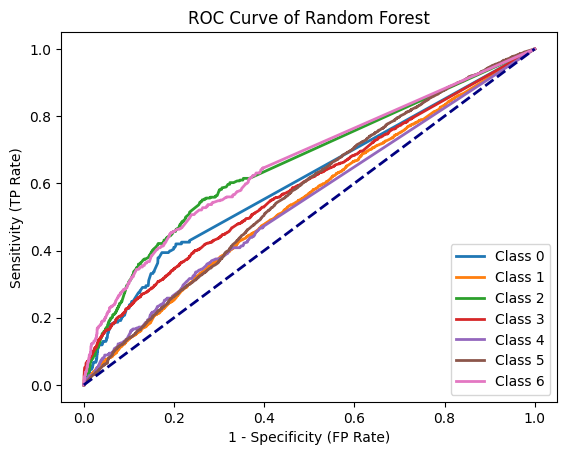

              MLP: accuracy score=0.5961 | f1 score=0.1690 | roc_auc_score=0.6792


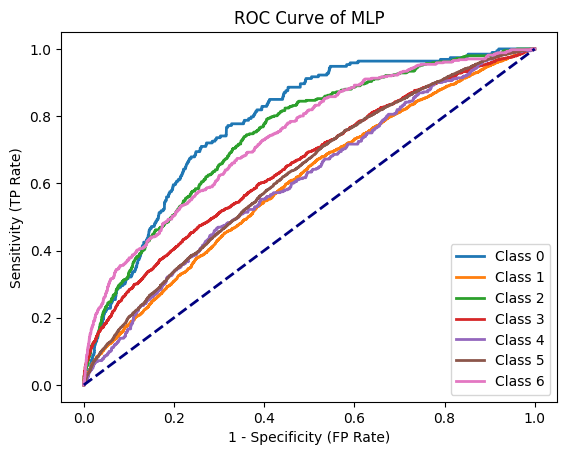

          XGBoost: accuracy score=0.5959 | f1 score=0.1477 | roc_auc_score=0.6817


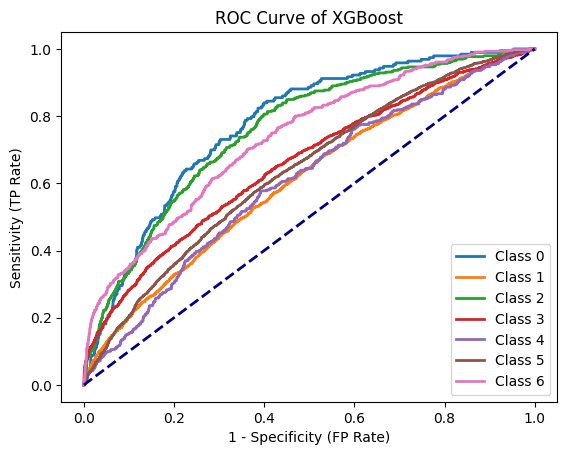

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
import numpy as np

# Calculate evaluation metrics and check if y_test and y_prob are not binary

for _name, _model in models.items():
    X_train, X_test, y_train, y_test = train_test_split(X[ColumnNames[_name]], y, test_size=test_size_ratio, random_state=random_state, shuffle=shuffle)

    _model.fit(X_train, y_train)

    y_pred = _model.predict(X_test)
    y_prob = _model.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    if len(np.unique(y_test)) > 2:
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    else:
        roc_auc = roc_auc_score(y_test, y_prob[:, 1])

    print("{:>17}: accuracy score={:.4f} | f1 score={:.4f} | roc_auc_score={:.4f}".format(
        _name, accuracy, f1, roc_auc)
    )

    plt.figure()
    if len(np.unique(y_test)) > 2:
        for i in range(len(np.unique(y_test))):
            fpr, tpr, _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
            plt.plot(fpr, tpr, lw=2, label='Class {}'.format(i))
    else:
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
        plt.plot(fpr, tpr, color="darkorange", lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("1 - Specificity (FP Rate)")
    plt.ylabel("Sensitivity (TP Rate)")
    plt.title("ROC Curve of " + _name)
    plt.legend(loc="lower right")
    plt.show()

# ***Interpretation***

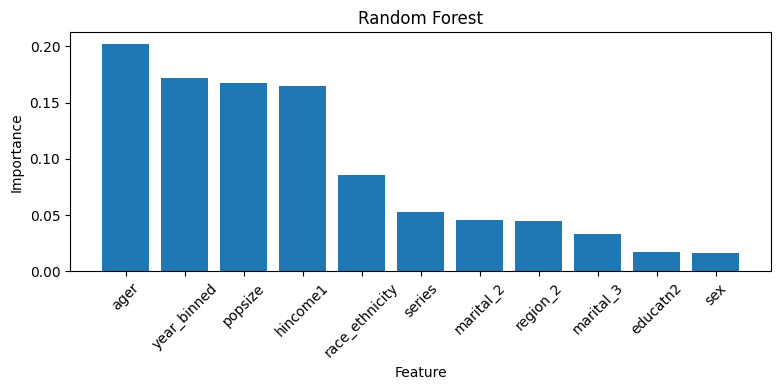

In [ ]:
# Draw the feature importances of Random Forest model

model_name = "Random Forest"

feature_importances = models[model_name].feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(8, 4))
plt.title(model_name)
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), X.columns[sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

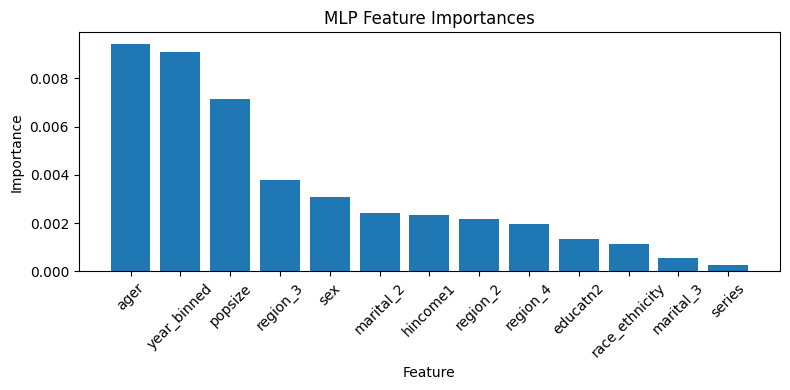

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Draw the feature importances of MLP model

model_name = "MLP"
model = models[model_name]

model.fit(X_train, y_train)

perm_importance = permutation_importance(model, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()[::-1]

plt.figure(figsize=(8, 4))
plt.title(f"{model_name} Feature Importances")
plt.bar(range(len(perm_importance.importances_mean)), perm_importance.importances_mean[sorted_idx], align="center")
plt.xticks(range(len(perm_importance.importances_mean)), X.columns[sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

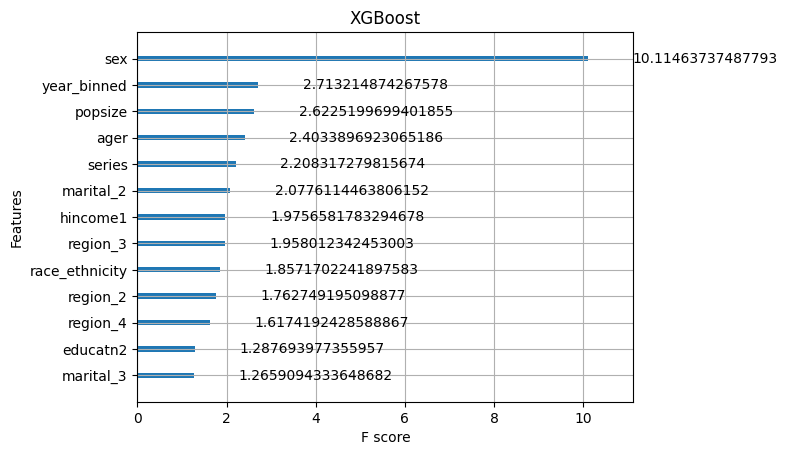

In [ ]:
import xgboost as xgb

# Draw the feature importances of XGBoost model

model_name = "XGBoost"
xgb.plot_importance(models[model_name],
                    importance_type="gain",
                    title=model_name)
plt.show()